# Bharath Gunasekaran
# CMPE-258 

Mnist with Kera MLP

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

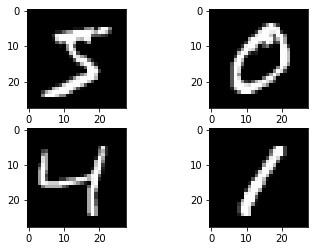

(28, 28)


In [3]:
# Looking at how the data looks
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()
print(x_train[0].shape)


In [4]:

# building the input vector from the 28x28 pixels
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000,  28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing Images
x_train = x_train/255
x_test = x_test/255


In [5]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)


In [6]:
"""
Building Model with 4 layers. I am using both relu, tanh, and softmax as my activation layers.
"""
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))
model.add(Dense(300))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [7]:
# compiling model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [8]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [9]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [10]:
history = model.fit(x_train, y_train, steps_per_epoch=len(x_train) / 128,
                              epochs = 20, validation_data = (x_test,y_test),
                              verbose = 2)

Epoch 1/20
468/468 - 3s - loss: 0.3254 - accuracy: 0.9023 - val_loss: 0.1133 - val_accuracy: 0.9657
Epoch 2/20
468/468 - 1s - loss: 0.1425 - accuracy: 0.9582 - val_loss: 0.1012 - val_accuracy: 0.9699
Epoch 3/20
468/468 - 1s - loss: 0.1064 - accuracy: 0.9688 - val_loss: 0.0958 - val_accuracy: 0.9712
Epoch 4/20
468/468 - 1s - loss: 0.0883 - accuracy: 0.9735 - val_loss: 0.0776 - val_accuracy: 0.9781
Epoch 5/20
468/468 - 1s - loss: 0.0727 - accuracy: 0.9788 - val_loss: 0.0727 - val_accuracy: 0.9803
Epoch 6/20
468/468 - 1s - loss: 0.0671 - accuracy: 0.9795 - val_loss: 0.0693 - val_accuracy: 0.9818
Epoch 7/20
468/468 - 1s - loss: 0.0568 - accuracy: 0.9824 - val_loss: 0.0810 - val_accuracy: 0.9789
Epoch 8/20
468/468 - 1s - loss: 0.0532 - accuracy: 0.9844 - val_loss: 0.0677 - val_accuracy: 0.9834
Epoch 9/20
468/468 - 1s - loss: 0.0499 - accuracy: 0.9845 - val_loss: 0.0747 - val_accuracy: 0.9802
Epoch 10/20
468/468 - 1s - loss: 0.0468 - accuracy: 0.9858 - val_loss: 0.0752 - val_accuracy: 0.9808

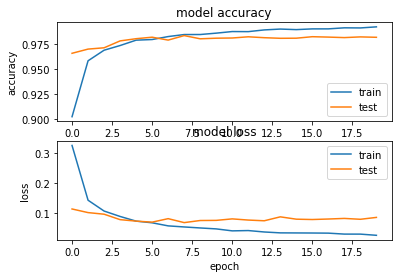

In [11]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [12]:
# Convert Y predict to a single class based on what label is maxed
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1) 
y_test = np.argmax(y_test, axis = 1) 

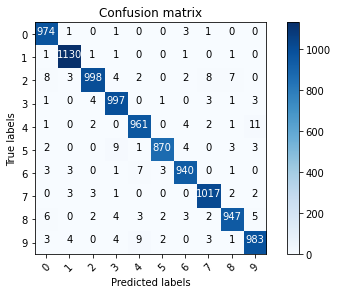

In [19]:
# Confusion matrix 
# Code referenced from https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')

confusion_mtx = confusion_matrix(y_test, y_pred) 

plot_confusion_matrix(confusion_mtx, classes = range(10))

In [16]:
# Finding all images that the model failed to predict
y_pred = np.array(y_pred)
y_true = np.array(y_test)
errors = (y_pred - y_true != 0)

y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]


In [17]:
def display_errors(img_errors, pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    index = 0
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            ax[row,col].imshow((img_errors[index]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[index],obs_errors[index]))
            n += 1
            index+=1

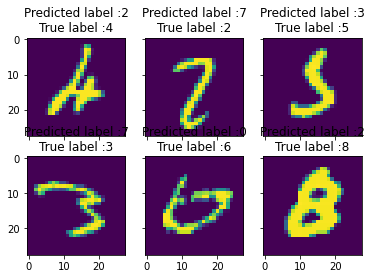

In [18]:
display_errors(x_test_errors,y_pred_errors,y_true_errors)